In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
TRAIN_PATH = "C:\\Users\\inilo\\OneDrive\\Escritorio\\ClasificadorCNN_Rocas\\src\\data"
TEST_PATH = "C:\\Users\\inilo\\OneDrive\\Escritorio\\ClasificadorCNN_Rocas\\src\\data"
VALID_PATH = "C:\\Users\\inilo\\OneDrive\\Escritorio\\ClasificadorCNN_Rocas\\src\\data"

In [14]:
train_dir = os.path.join(TRAIN_PATH, 'train')
validation_dir = os.path.join(VALID_PATH, 'valid')
test_dir = os.path.join(TEST_PATH, 'test')

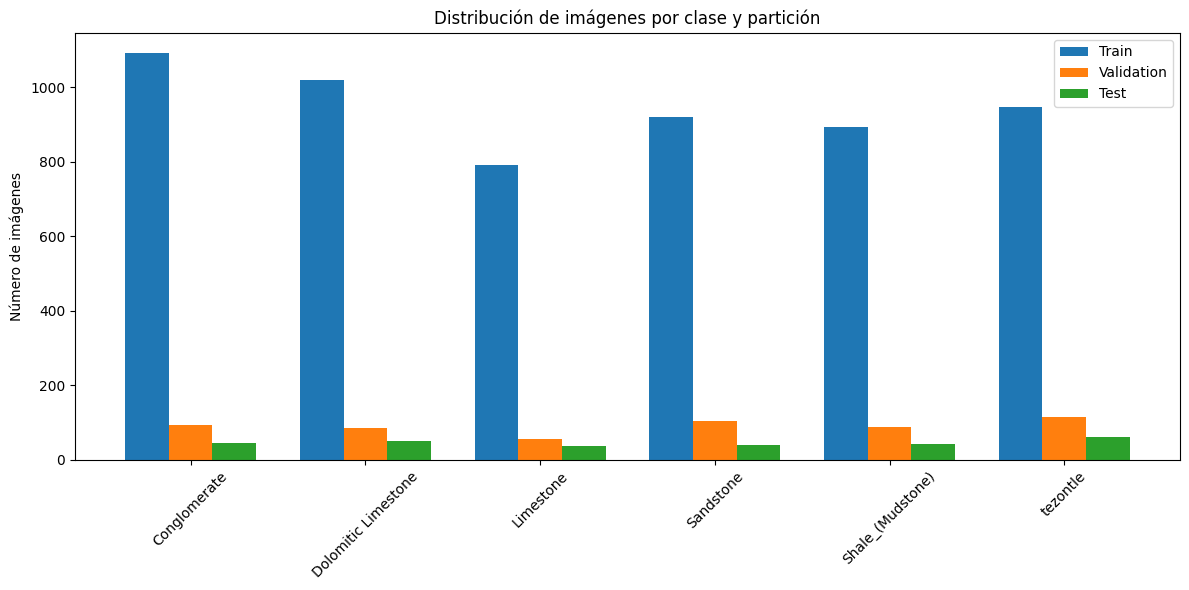

In [15]:
def contar_imagenes_por_clase(ruta):
    conteo = {}
    for clase in os.listdir(ruta):
        clase_path = os.path.join(ruta, clase)
        if os.path.isdir(clase_path):
            n_imagenes = len([f for f in os.listdir(clase_path) if os.path.isfile(os.path.join(clase_path, f))])
            conteo[clase] = n_imagenes
    return conteo

# Contar imágenes
conteo_train = contar_imagenes_por_clase(train_dir)
conteo_valid = contar_imagenes_por_clase(validation_dir)
conteo_test = contar_imagenes_por_clase(test_dir)

# Unificar clases (en caso de que alguna clase falte en alguna partición)
todas_las_clases = sorted(set(conteo_train) | set(conteo_valid) | set(conteo_test))

# Armar listas ordenadas
train_counts = [conteo_train.get(clase, 0) for clase in todas_las_clases]
valid_counts = [conteo_valid.get(clase, 0) for clase in todas_las_clases]
test_counts = [conteo_test.get(clase, 0) for clase in todas_las_clases]

# Dibujar gráfico
x = range(len(todas_las_clases))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar([i - width for i in x], train_counts, width=width, label='Train')
plt.bar(x, valid_counts, width=width, label='Validation')
plt.bar([i + width for i in x], test_counts, width=width, label='Test')

plt.xticks(x, todas_las_clases, rotation=45)
plt.ylabel("Número de imágenes")
plt.title("Distribución de imágenes por clase y partición")
plt.legend()
plt.tight_layout()
plt.show()